#  Part II - Presentation of Telecom Customer Churn Insights

## Chisom Promise Nnamani

## Investigation Overview

In this investigation, I'm most interested in figuring out what feature affect customer churn in the dataset. i.e how each of the other features determines if the will stay or leave the telecom company.

I will start with the distribution of churn, contract renewal and data plan features, then proceed to see how churn is being affected by contract renewal, data plan, monthly charges, and customer service calls, e.t.c.


## Dataset Overview

This dataset contains 3333 rows representing each customer, with 11 features or variables.

8 of the features which include (account_weeks, data_usage, customer_service_calls, day_mins, day_calls, monthly_charge, overage_fee. roam_mins) are numerical data types, while the other 3 which are (churn, contract_renewal, and data plan) are in categorical data type.

This dataset was sourced from Kaggle and can be obtained via this [link](https://www.kaggle.com/datasets/barun2104/telecom-churn)


**Important questions we expect to be answered via this presentation:**

 1. What features contribute more to customer churn?
 
 
 2. Who are the customers more likely to churn?
 

 3. What actions can be taken to stop them from leaving?

In [1]:
# import all packages to be used for analysis and visualization
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
# load in the dataset into a pandas dataframe
customer_data = pd.read_csv('telecom_churn.csv')

### Column Description:

Each row represents a customer and each column contains attributes related to customer as described in the column description.

The “Churn” column is our target variable.

 - **Churn:** 1 if customer cancelled service, 0 if not
 
 
 - **AccountWeeks:** number of weeks customer has had active account
 
 
 - **ContractRenewal:** 1 if customer recently renewed contract, 0 if not
 
 
 - **DataPlan:** 1 if customer has data plan, 0 if not
 

 - **DataUsage:** gigabytes of monthly data usage
 

 - **CustServCalls:** number of calls into customer service
 

 - **DayMins:** average daytime minutes per month
 

 - **DayCalls:** average number of daytime calls
 

 - **MonthlyCharge:** average monthly bill
 

 - **OverageFee:** largest overage fee in last 12 months
 

 - **RoamMins:** average number of roaming minutes

In [3]:
# making copy of original data
customer_info = customer_data.copy()

In [4]:
# Seperate the column labels that are made up two words with a hyphen
customer_info.rename(columns={'AccountWeeks': 'Account_Weeks', 'ContractRenewal': 'Contract_Renewal',
                              'DataPlan': 'Data_Plan', 'DataUsage': 'Data_Usage',
                              'CustServCalls': 'Customer_Service_Calls', 'DayMins': 'Day_Minutes', 'DayCalls': 'Day_Calls',
                              'MonthlyCharge': 'Monthly_Charge', 'OverageFee': 'Overage_Fee', 'RoamMins': 'Roam_Minutes'},
                     inplace = True)

# change the name of the column labels to lower case
customer_info.rename(columns=lambda x: x.lower(), inplace=True)

In [5]:
# change the value of the churn, contract_renewal, and data_plan for easy manipulation
customer_info['churn'] = np.where(customer_info['churn'] == 1, 'Left', 'Stayed')
customer_info['contract_renewal'] = np.where(customer_info['contract_renewal'] == 1, 'Renewed', 'Not Renewed')
customer_info['data_plan'] = np.where(customer_info['data_plan'] == 1, 'Yes', 'No')

In [6]:
# change churn, customer_renewal, and data__plan values into category data type
cat_col = ['churn', 'contract_renewal', 'data_plan']
customer_info[cat_col] = customer_info[cat_col].astype('category')

## Distribution of Churn

**For the 'Churn' variable: How high is the proprotion of customers which cancelled the service?**

From the chart and the descriptive statistics of the "Churn" column below, we can see that **483(14.4%) customers were lost** by the telecom company, and **more than 2500(85.5%) were retained by the company**. 483 might seem a small number but that number could have fetch good profit for the Telecom company.

        churn
Stayed   2850
Left      483
            churn
Stayed  85.508551
Left    14.491449


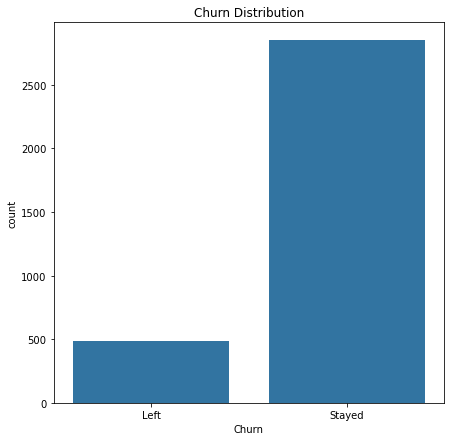

In [7]:
# let's get the value count of each churn value in a data frame
print(pd.DataFrame(customer_info['churn'].value_counts()))

# let's get the percentage of each churn value count
print(pd.DataFrame(customer_info['churn'].value_counts(normalize=True)*100))

color = sns.color_palette()[0]
plt.figure(figsize =(7,7))
sns.countplot(data=customer_info, x = 'churn', color=color);
plt.xlabel('Churn')
plt.title('Churn Distribution');

## Distribution of Contract Renewal

**For the 'Contract Renewal' variable: How many customers recently renewed their contract?**

From the chart and the descriptive statistics of the "Contract Renewal" column below, we can see that **323(9.7%) customers did not recently renew their contract**, and **3010(90%) recently renewed their contract**. 

             contract_renewal
Renewed                  3010
Not Renewed               323
             contract_renewal
Renewed             90.309031
Not Renewed          9.690969


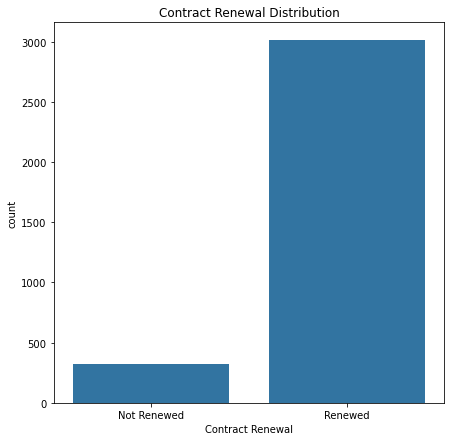

In [8]:
# let's get the value count of each contract renewal value in a data frame
print(pd.DataFrame(customer_info['contract_renewal'].value_counts()))

# let's get the percentage of each contract renewal value count
print(pd.DataFrame(customer_info['contract_renewal'].value_counts(normalize=True)*100))

color = sns.color_palette()[0]
plt.figure(figsize =(7,7))
sns.countplot(data=customer_info, x = 'contract_renewal', color=color);
plt.xlabel('Contract Renewal')
plt.title('Contract Renewal Distribution');

## Distribution of Data Plan

**For the 'Data Plan' variable: How many customers had data plan and how many did not?**

From the chart belo, with the this descriptive statistics of the data plan column, we can see that only **922(27.6%) of the customers have** data plan while **2411(72%) of the customers do not** have data plan. 

     data_plan
No        2411
Yes        922
     data_plan
No   72.337234
Yes  27.662766


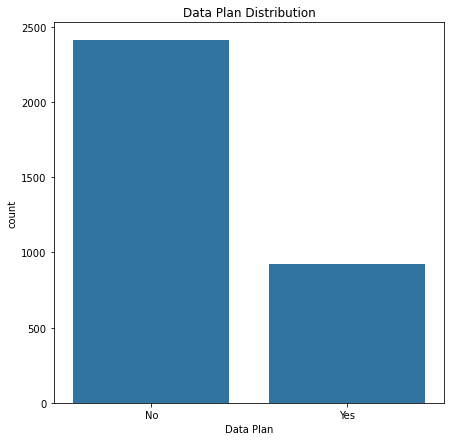

In [9]:
# let's get the value count of each data plan value in a data frame
print(pd.DataFrame(customer_info['data_plan'].value_counts()))

# let's get the percentage of each contract renewal value count
print(pd.DataFrame(customer_info['data_plan'].value_counts(normalize=True)*100))

base_color = sns.color_palette()[0]
plt.figure(figsize =(7,7))
sns.countplot(data = customer_info, x = 'data_plan', color=color);
plt.xlabel('Data Plan')
plt.title('Data Plan Distribution');

## Distribution of Data Usage

For the data usage hist plot: This is the gigabytes of monthly data usage. The plot is skewed to the right, with the highest data usage value being 0. This means that about 2500 customers did not subscribe or use any data monthly.

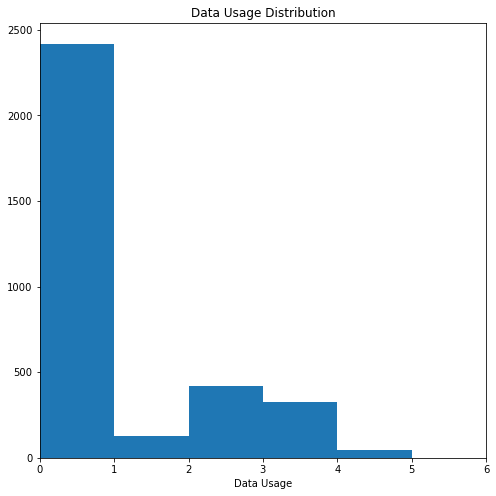

In [10]:
plt.figure(figsize= [8, 8])
bins = np.arange(0, customer_info['data_usage'].max()+1, 1);
plt.hist(data=customer_info, x='data_usage', bins = bins);
plt.xlim(0, 6);
plt.title('Data Usage Distribution')
plt.xlabel('Data Usage');

## Distribution of Monthly Charge

For monthly charge hist plot: This is the average monthly bill charged by the company. The plot is slightly skewed to the right, with most of its customers (more than 800) being charges 40 to 60 dollars monthly.

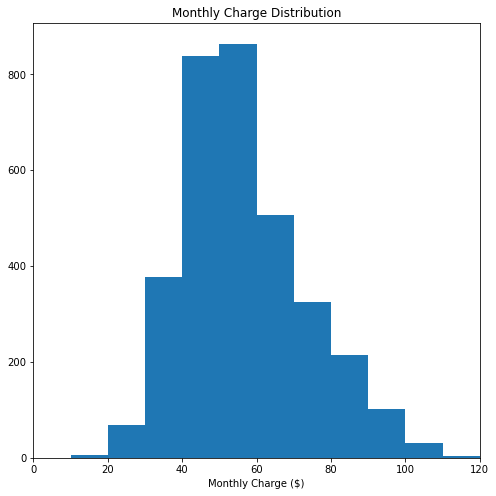

In [11]:
plt.figure(figsize= [8, 8]);
bins = np.arange(10, customer_info['monthly_charge'].max()+10, 10);
plt.hist(data=customer_info, x='monthly_charge', bins = bins);
plt.xlim(0, 120);
plt.title('Monthly Charge Distribution')
plt.xlabel('Monthly Charge ($)');

## Distribution of Customer Service Calls

For the customer service calls plot: The plot is skewed to the right, with about 1200 customers making up to 2 customer service calls per day.

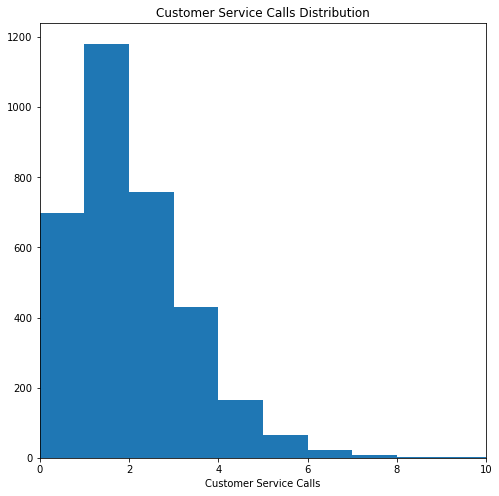

In [12]:
plt.figure(figsize= [8, 8]);
bins = np.arange(0, customer_info['customer_service_calls'].max()+1.1, 1);
plt.hist(data=customer_info, x='customer_service_calls', bins = bins);
plt.xlim(0, 10);
plt.title('Customer Service Calls Distribution')
plt.xlabel('Customer Service Calls');

## Churn vs Data plan
Interesting insight! From our descriptive statistics which backs up our heatmaps plot, we could see that about **80(8.5%)** of the customers who had data plans were still lost by the company. But a higher percentage of **403(16.7%**) who did not have data plan were lost by the company. This graph and stattistics showed us that no data plan leads to customer churn.

And looking at the number of people who had no data plan but still stayed, about **2008(83%)** of them. That's a lot of profit waiting to be harnessed if we could convince these customers to buy data plans from the company.

In [13]:
# creating a function that plots a heatmap for two categorical variables
def heat_map(cat_1, cat_2):
    plt.figure(figsize = (8,7))
    # Use group_by() and size() to get number of values in each category
    ct_counts = customer_info.groupby([cat_1, cat_2]).size()

    # Use series.reset_index() to convert a series into a dataframe object
    ct_counts = ct_counts.reset_index(name='count')

    # Use DataFrame.pivot() to rearrange the data, to have data plan values on rows
    ct_counts = ct_counts.pivot(index = cat_1, columns = cat_2, values = 'count')
    
    # plot the heatmap
    sns.heatmap(ct_counts, annot = True, fmt = '.1f', cmap = 'viridis_r');
    plt.title('Heat map of {} vs {}'.format(cat_2.capitalize(), cat_1.capitalize()));
    plt.ylabel('{}'.format(cat_1.replace('_', ' ').capitalize()));
    plt.xlabel('{}'.format(cat_2.replace('_', ' ').capitalize()));

                  churn
data_plan              
No        Stayed   2008
          Left      403
Yes       Stayed    842
          Left       80
                      churn
data_plan                  
No        Stayed  83.284944
          Left    16.715056
Yes       Stayed  91.323210
          Left     8.676790


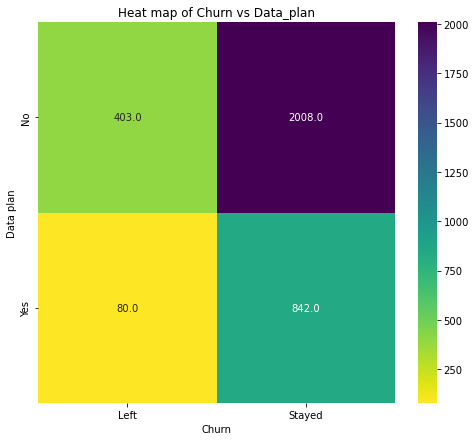

In [14]:
# let's use groupby to compare data plan and churn value counts
print(pd.DataFrame(customer_info.groupby('data_plan')['churn'].value_counts()))

# let's get the percentage
print(pd.DataFrame(customer_info.groupby('data_plan')['churn'].value_counts(normalize=True)*100))

heat_map('data_plan', 'churn')

## Churn vs Contract renewal

From this descriptive statistics, we can see that about 137(42%) of the customers who did not recently renewed their contract were lost by the company, while only about 346(11%) of the customers who recently renwed their contract were lost by the company.

                         churn
contract_renewal              
Not Renewed      Stayed    186
                 Left      137
Renewed          Stayed   2664
                 Left      346
                             churn
contract_renewal                  
Not Renewed      Stayed  57.585139
                 Left    42.414861
Renewed          Stayed  88.504983
                 Left    11.495017


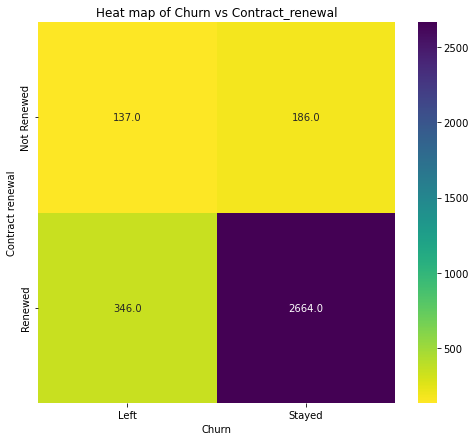

In [15]:
# let's use groupby to compare contract renewal and churn value counts
print(pd.DataFrame(customer_info.groupby('contract_renewal')['churn'].value_counts()))

# let's get the percentage
print(pd.DataFrame(customer_info.groupby('contract_renewal')['churn'].value_counts(normalize=True)*100))

heat_map('contract_renewal', 'churn')

## Data plan vs Contract renewal

Okay! This is becoming interesting. From our descriptive statistics, we could see that **231(72%)** of the customers who did not renew their contract had no data plan, and almost same percentage about **2180(72%)** of the customers who renewed their contract but still had no data plan.

                      data_plan
contract_renewal               
Not Renewed      No         231
                 Yes         92
Renewed          No        2180
                 Yes        830
                      data_plan
contract_renewal               
Not Renewed      No   71.517028
                 Yes  28.482972
Renewed          No   72.425249
                 Yes  27.574751


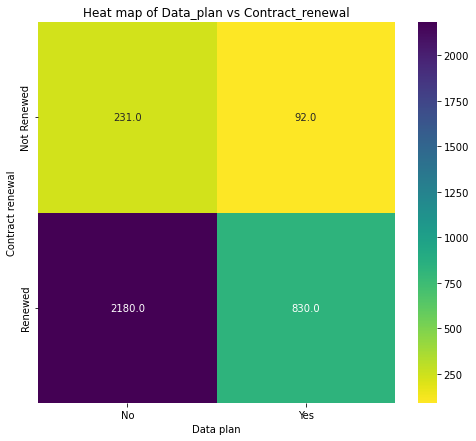

In [16]:
# let's use groupby to compare contract renewal and data plan value counts
print(pd.DataFrame(customer_info.groupby('contract_renewal')['data_plan'].value_counts()))

# let's get the percentage
print(pd.DataFrame(customer_info.groupby('contract_renewal')['data_plan'].value_counts(normalize=True)*100))

heat_map('contract_renewal', 'data_plan')

## Churn vs Data usage

We see both median of the boxplots are at zero. We remember that more than 25000 of its customers had 0 data usage, so these customers cancelled the company's services. Then, only half of the people who use data did not cancel the company. That means some of them must have cancelled the company too. But then majority of the customers who stayed with the company had data usage.

So, we need to find a way to encourage all customers to make more subscriptions.

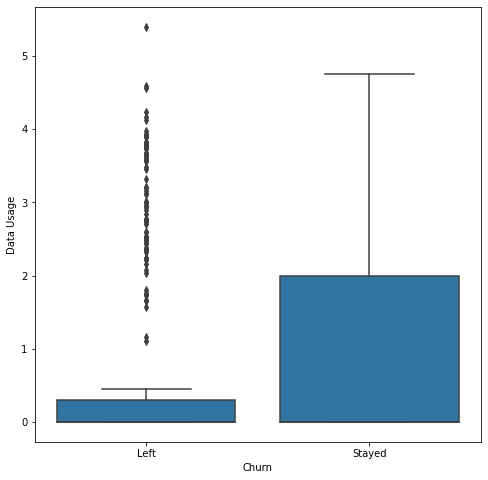

In [17]:
plt.figure(figsize=[8, 8])
sns.boxplot(data=customer_info, x='churn', y='data_usage', color=base_color)
plt.xticks(rotation=0)
plt.xlabel('Churn')
plt.ylabel('Data Usage');

## Data plan and Data Usage

The plot clearly shows that the customers with no data plan had lowest data usage and the customers who had data plan had a high data usage.

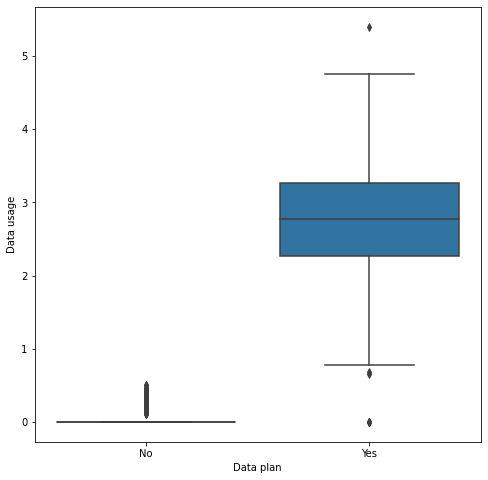

In [18]:
plt.figure(figsize=[8, 8])
sns.boxplot(data=customer_info, x='data_plan', y='data_usage', color=base_color)
plt.xticks(rotation=0)
plt.xlabel('Data plan')
plt.ylabel('Data usage');

## Monthly charge and Data Plan

Okay, we notice that the customers who had data plan were charged high monthly charges were more than the people with no data plan and low monthly charges. But did former recently renew their contract?


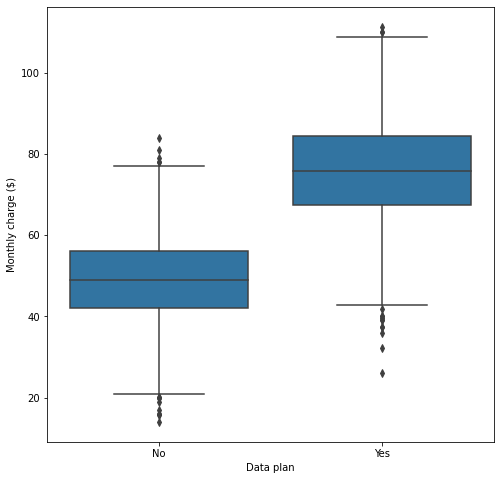

In [19]:
plt.figure(figsize=[8, 8])
sns.boxplot(data=customer_info, x='data_plan', y='monthly_charge', color=base_color)
plt.xticks(rotation=0)
plt.xlabel('Data plan')
plt.ylabel('Monthly charge ($)');

## Monthly charge and contract renwal

Now we see that people with high monthly charges did not recently renew their contracts. They are leaving the company.

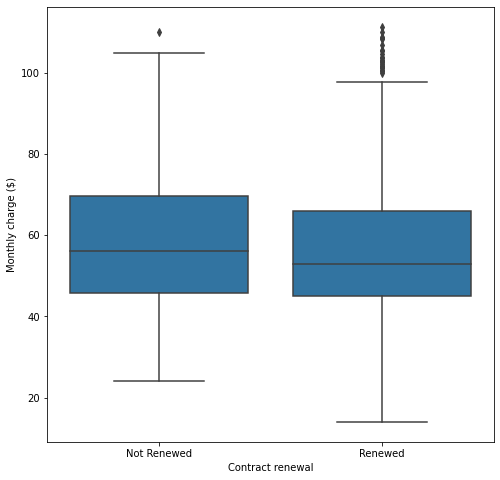

In [20]:
## Monthly charge and Contract renewal

plt.figure(figsize=[8, 8])
sns.boxplot(data=customer_info, x='contract_renewal', y='monthly_charge', color=base_color)
plt.xticks(rotation=0)
plt.xlabel('Contract renewal')
plt.ylabel('Monthly charge ($)');

## Churn vs Data usage vs Monthly Charge

We could see that there is a positive correlation between data usage and monthly charge, and they both affect customer churn. We can also observe is that most customers with low to no data usage but received a high monthly charge left the company.

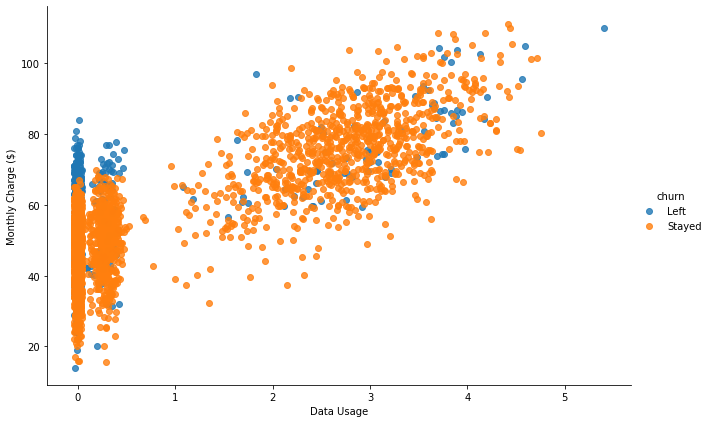

In [21]:
# Use color encodings to encode churn as the third variable

# Create scatterplot
g = sns.FacetGrid(data = customer_info, hue = 'churn', hue_order=['Left', 'Stayed'], height=6, aspect=1.5)
g = g.map(sns.regplot, 'data_usage', 'monthly_charge', x_jitter = 0.04, fit_reg = False);
g.add_legend()
plt.xlabel('Data Usage')
plt.ylabel('Monthly Charge ($)');

## Churn vs Day minutes vs Monthly Charge

From the scatter plot, it is clearly evident that there exists a correlation between day minutes and monthly charge. Looking at the upper right, you will see customers leaving the company. This is being caused by high monthly charges.

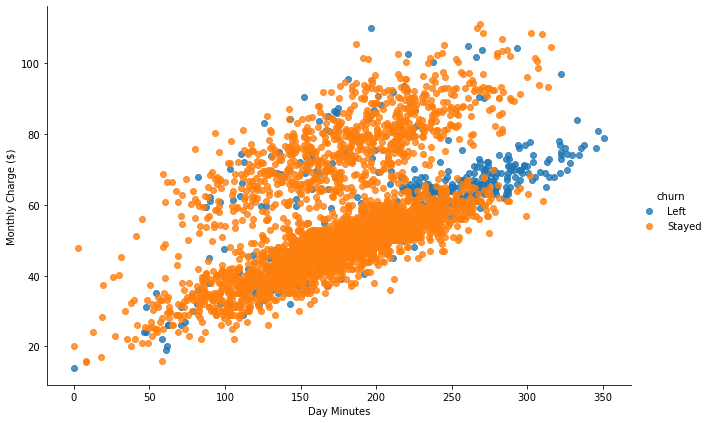

In [22]:
# Use color encodings to encode churn as the third variable

# create scatterplot
g = sns.FacetGrid(data = customer_info, hue = 'churn', hue_order=['Left', 'Stayed'], height=6, aspect=1.5)
g = g.map(sns.regplot, 'day_minutes', 'monthly_charge', x_jitter = 0.04, fit_reg = False);
g.add_legend()
plt.xlabel('Day Minutes');
plt.ylabel('Monthly Charge ($)');

## Contract renewal vs Data usage vs Monthly Charge

We could see the increasing monthly charges where we have more data points. This shows us that most oof these customers weren't using any data but still recieved high monthly charge, which eventually resulted in most of them not renewing their contracts.

Then it's also clear that few of the customers who had data usage later started leaving the company. Both occurences are seen to be caused by increase in monthly charges.

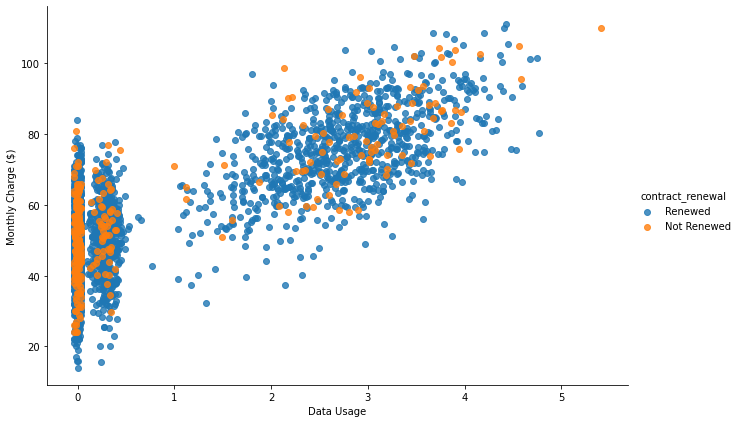

In [23]:
# Use color encodings to encode contract renewal as the third variable

# Create scatterplot
g = sns.FacetGrid(data = customer_info, hue = 'contract_renewal', hue_order=['Renewed', 'Not Renewed'], height=6, aspect=1.5)
g = g.map(sns.regplot, 'data_usage', 'monthly_charge', x_jitter = 0.04, fit_reg = False);
g.add_legend()
plt.xlabel('Data Usage');
plt.ylabel('Monthly Charge ($)');

## Data plan vs Dta Usage vs Monthly charge

Here, it's clearly evident that the customers who do not use data, have no data plan but still get a high monthly charge.

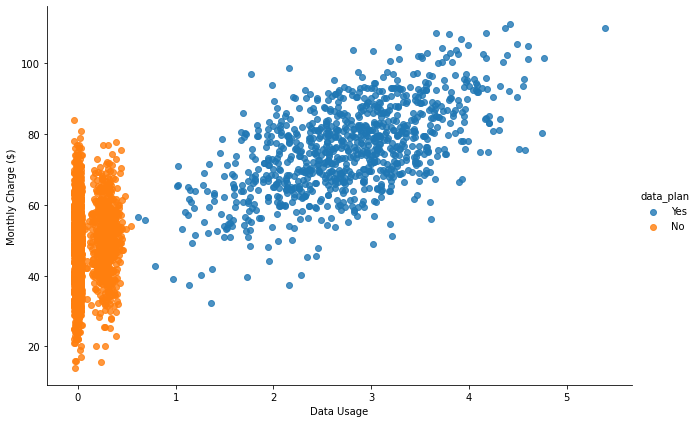

In [24]:
# Use color encodings to encode data plan as the third variable

# Create scatterplot
g = sns.FacetGrid(data = customer_info, hue = 'data_plan', hue_order=['Yes', 'No'], height=6, aspect=1.5)
g = g.map(sns.regplot, 'data_usage', 'monthly_charge', x_jitter = 0.04, fit_reg = False);
g.add_legend()
plt.xlabel('Data Usage');
plt.ylabel('Monthly Charge ($)');

## Churn vs Data plan vs Data Usage

Here we see again that the number of customers who had data plan being close to zero, and we then see that most of the customers who had data plan and high data usage later left the company.

What could have caused this? We have seen in the previous scatter plot between data usage and monthly charge that the customers who had more data usage had more monthly charges. So monthly charge could have resulted in them leaving the company.

In [25]:
# A function to create a bivariate barplot of two categorical variable and one numeric variable
def barplot(cat_var1, num_var, cat_var2):
    plt.figure(figsize = (7, 7))
    sns.barplot(data = customer_info, x = cat_var1, y = num_var, hue = cat_var2, errwidth = 0)
    plt.ylabel('{}'.format(num_var.replace('_', ' ').capitalize()));
    plt.xlabel('{}'.format(cat_var1.replace('_', ' ').capitalize()));

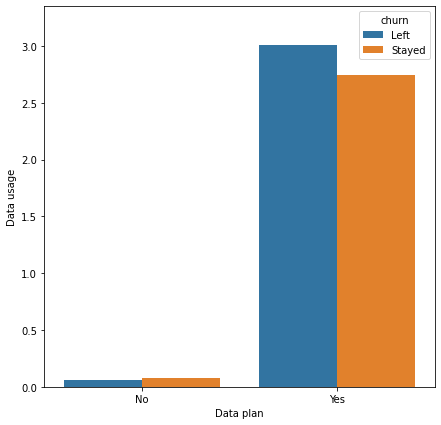

In [26]:
barplot('data_plan', 'data_usage', 'churn')

## Churn vs Data usage vs Contract renewal

Now we see that more of the customers who had high data usage did not renew their contracts, and were eventually lost by the company. From the proof we have seeen from the data, the high data usage leading to high monthly charges.

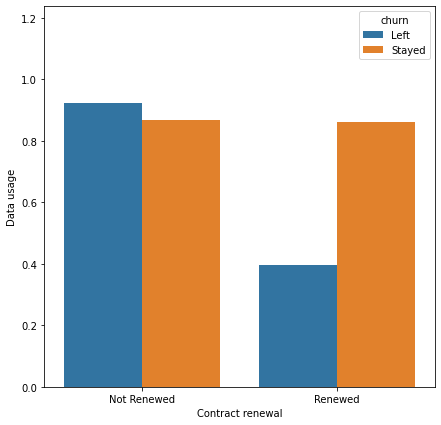

In [27]:
barplot('contract_renewal', 'data_usage', 'churn')

## Contract renewal vs Data usage vs Data plan

Here, we could see that the number of customers who had no data plan and no data usage are same when it comes to renewing or not renewing their contract.

But the number of customers who had data plan, with high data usage and eventually did not recently renew their contract are highrer that the people who had data plan with data usage and recently renew their contract.

It's safe to say that high data usage makes them not to renew their contract.

And we have seen many times what could have led to this which is high monthly charges.

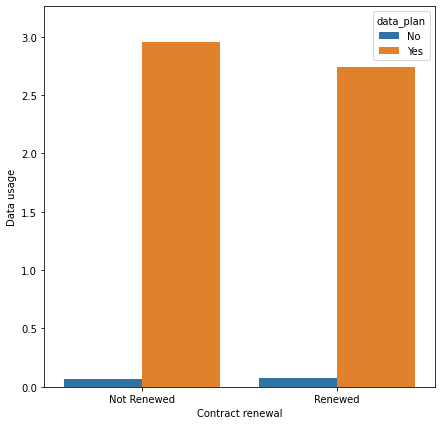

In [28]:
barplot('contract_renewal', 'data_usage', 'data_plan')

## Churn vs Customer Servive Calls vs Contract Renewal

We could see that the customers recently renewed thier contract but made made more than 2 calls to the customer service, eventually left the company or cancelled the company's services.

Why did that happen? Mybe their issues not being resolved after the calls were made to made to the customer service or their issues weren't resolved within a small amount of time.

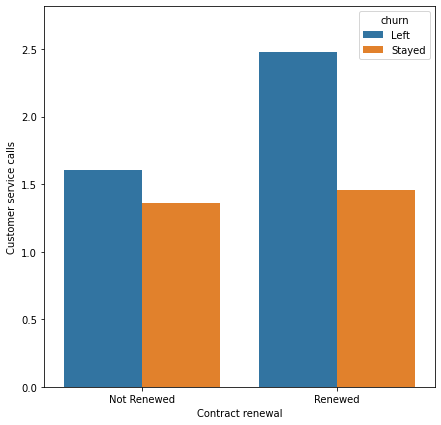

In [29]:
barplot('contract_renewal', 'customer_service_calls', 'churn')

**Generate Slideshow:** Once you're ready to generate your slideshow, use the jupyter nbconvert command to generate the HTML slide show. . From the terminal or command line, use the following expression.

In [30]:
# jupyter nbconvert Part_II_Slide_Deck_Template.ipynb --to slides --post serve --no-input --no-prompt

This should open a tab in your web browser where you can scroll through your presentation. Sub-slides can be accessed by pressing 'down' when viewing its parent slide. Make sure you remove all of the quote-formatted guide notes like this one before you finish your presentation! At last, you can stop the Kernel.